Project root added to sys.path: d:\Handwritten Digit Recognition

 Test Accuracy: 0.8817
⏱ Training time: 58.07 sec
⏱ Prediction time: 0.08 sec

 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       980
           1       0.96      0.97      0.97      1135
           2       0.88      0.85      0.87      1032
           3       0.85      0.88      0.87      1010
           4       0.86      0.86      0.86       982
           5       0.84      0.82      0.83       892
           6       0.90      0.91      0.91       958
           7       0.91      0.89      0.90      1028
           8       0.83      0.85      0.84       974
           9       0.84      0.84      0.84      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



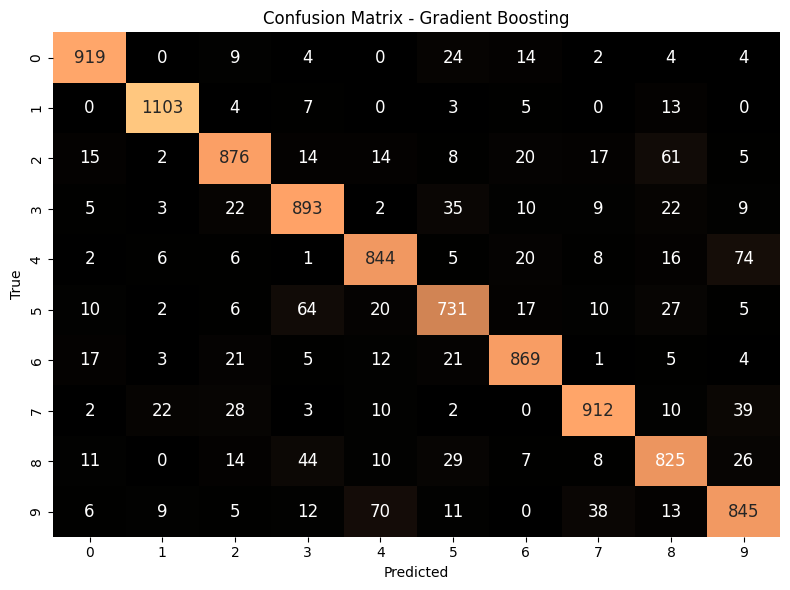

In [1]:
%run ../utils/init_notebook.py

from utils.data_loader import load_mnist
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
X_train, y_train, X_test, y_test = load_mnist(normalise=True)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Use subset for speed
subset_size = 10000
X_train_sub = X_train_flat[:subset_size]
y_train_sub = y_train[:subset_size]

# PCA to reduce dimensionality
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_sub)
X_test_pca = pca.transform(X_test_flat)

# Train
gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)
start_train = time.time()
gb_model.fit(X_train_pca, y_train_sub)
end_train = time.time()

# Predict
start_pred = time.time()
y_pred_gb = gb_model.predict(X_test_pca)
end_pred = time.time()

# Accuracy
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"\n Test Accuracy: {acc_gb:.4f}")
print(f"⏱ Training time: {end_train - start_train:.2f} sec")
print(f"⏱ Prediction time: {end_pred - start_pred:.2f} sec")

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_gb))

#Confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="copper", cbar=False, annot_kws={"size":12})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Gradient Boosting")
plt.tight_layout()
plt.show()
